In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras.utils import to_categorical
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


<br>
<br>

# 데이터 로드

In [2]:
# MNIST 데이터를 로드
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [3]:
# 훈련셋 크기
# 28x28 사이즈의 손글씨 이미지가 60000개 존재
train_data.shape


(60000, 28, 28)

In [4]:
# 훈련셋 라벨 크기
train_labels.shape


(60000,)

In [5]:
# 테스트셋 크기
test_data.shape


(10000, 28, 28)

In [6]:
# 테스트셋 라벨 크기
test_labels.shape


(10000,)

In [7]:
# 첫 번째 훈련셋 출력
# 각 픽셀이 0~255 사이의 흑백 컬러를 나타냄
train_data[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

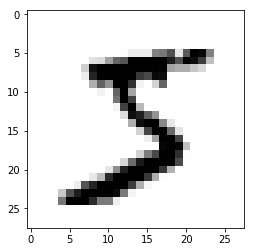

In [8]:
# 첫 번째 훈련셋 이미지 출력
image = train_data[0]

plt.imshow(image, cmap=plt.cm.binary) # 컬러맵을 흑백(binary)으로 설정
plt.show()


In [9]:
# 첫 번째 훈련셋 라벨 출력
train_labels[0]


5

<br>
<br>

# 전처리

In [10]:
x_train = train_data.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = test_data.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

원래 train_data의 크기는 (60000, 28, 28)이었습니다. 나중에 배울 CNN 모델에서는 28x28 같이 다중 행렬을 바로 입력으로 넣을 수 있습니다. 하지만 일반적인 dense 신경망은 일차원 벡터만 입력이 가능합니다. 그래서 (28, 28)을 (28x28=784)로 reshape 변환하였습니다. 이렇게 다중 행렬을 일자로 만드는 것을 flatten이라고 부릅니다.

다음으로 0~255사이의 정수를 0~1의 실수로 변경하였습니다. 물론 신경망에 정수값을 바로 넣을 수도 있습니다. 그러나 0~1 또는 -1~1 사이의 실수값을 입력하는게 학습에 더 효과적입니다.
<br>
<br>
<br>

In [11]:
# 훈련셋의 크기가 변경됨
x_train.shape


(60000, 784)

In [12]:
# 첫 번째 훈련셋 출력
# 흑백 컬러가 0~1 사이의 실수로 표현됨
x_train[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
# 라벨을 숫자 인덱스에서 One-hot encoding으로 변경
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [14]:
# 첫 번째 훈련셋 라벨 출력
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
# 훈련셋에서 검증셋 분리
x_val = x_train[:10000]
x_train_new = x_train[10000:]

y_val = y_train[:10000]
y_train_new = y_train[10000:]

<br>
<br>

# 모델 생성

In [16]:
def build_model():
    
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])    
    
    return model

첫 번째 레이어의 input_shape는 이미지의 가로와 세로를 곱한 28x28 = 784개입니다. 두 번째 레이어의 노드는 모두 10개로 각각 0~9 사이의 숫자를 가르킵니다. 숫자의 위치에 맞는 출력이 1이고 나머지는 모두 0이 됩니다. 

2.1의 영화 리뷰 예제에서는 마지막 활성화 함수가 sigmoid였습니다. 물론 여기서도 동일하게 설정할 수 있지만, 그것보다는 보통 softmax를 사용합니다. 이렇게 하나의 출력만 1이고 나머지는 0인 One-hot 벡터일 경우에는 sigmoid보다 softmax가 더 학습이 잘 됩니다.

이진 분류에서는 손실 함수로 biniary_crossentropy를 사용하였습니다. 이번 예제는 다중 분류이기 때문에 categorical_crossentropy로 설정하였습니다.

<br>
<br>

# 훈련 및 평가

In [17]:
# 모델 생성
model = build_model()

# 훈련 시작
history = model.fit(x_train_new,
                    y_train_new,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 5s 106us/step - loss: 0.4356 - acc: 0.8764 - val_loss: 0.2610 - val_acc: 0.9246
Epoch 2/40
50000/50000 [==============================] - 5s 102us/step - loss: 0.1979 - acc: 0.9429 - val_loss: 0.1674 - val_acc: 0.9516
Epoch 3/40
50000/50000 [==============================] - 5s 107us/step - loss: 0.1359 - acc: 0.9616 - val_loss: 0.1303 - val_acc: 0.9617
Epoch 4/40
50000/50000 [==============================] - 5s 98us/step - loss: 0.1016 - acc: 0.9700 - val_loss: 0.1041 - val_acc: 0.9692
Epoch 5/40
50000/50000 [==============================] - 5s 107us/step - loss: 0.0794 - acc: 0.9765 - val_loss: 0.0898 - val_acc: 0.9738
Epoch 6/40
50000/50000 [==============================] - 5s 109us/step - loss: 0.0639 - acc: 0.9817 - val_loss: 0.0886 - val_acc: 0.9731
Epoch 7/40
50000/50000 [==============================] - 5s 104us/step - loss: 0.0516 - acc: 0.9849 - val_loss: 0.0885 - v

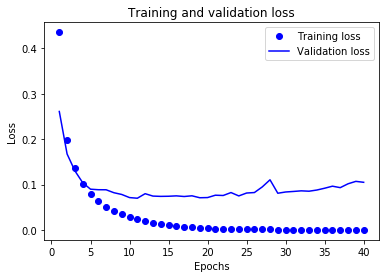

In [18]:
loss = history.history['loss']         # 훈련 손실
val_loss = history.history['val_loss'] # 검증 손실

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      # bo -> 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b -> 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


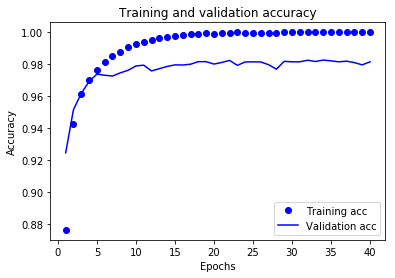

In [19]:
acc = history.history['acc']           # 훈련 정확도
val_acc = history.history['val_acc']   # 검증 정확도

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


손실과 정확도 그래프를 살펴보겠습니다. 20번째 에폭부터 과대적합이 되는 것을 알 수 있습니다. 이제 과대적합을 피하기 위해서 에폭을 20로 수정하고 다시 학습을 합니다.
<br>
<br>
<br>

In [20]:
model = build_model()
model.fit(x_train, y_train, epochs=20, batch_size=512)


Epoch 1/20
60000/60000 [==============================] - 5s 92us/step - loss: 0.3921 - acc: 0.8883
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1769 - acc: 0.9491: 1s - loss: 0.185
Epoch 3/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1191 - acc: 0.9661
Epoch 4/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0894 - acc: 0.9740
Epoch 5/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0690 - acc: 0.9801
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0555 - acc: 0.9837
Epoch 7/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0444 - acc: 0.9872
Epoch 8/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.0369 - acc: 0.9896
Epoch 9/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0301 - acc: 0.9916
Epoch 10/20
60000/60000 [==============================] - 7s 115us/step - loss:

In [21]:
# 모델 저장
model.save('./model/mnist_model.h5')

<br>
<br>

# 테스트셋 확인

In [22]:
# 저장된 모델 파일 로드
model = models.load_model('./model/mnist_model.h5')

In [23]:
# 테스트셋 평가
results = model.evaluate(x_test, y_test)
results


10000/10000 [==============================] - 1s 110us/step


[0.0684537830774465, 0.9814]

테스트셋의 정확도가 98%를 달성하였습니다. 
<br>
<br>
<br>

In [24]:
# 테스트셋 예측
results = model.predict(x_test)
results


array([[2.1862305e-10, 3.7502534e-13, 5.5071832e-09, ..., 9.9993062e-01,
        4.1575333e-08, 3.7419514e-07],
       [2.5016055e-12, 5.0522740e-08, 1.0000000e+00, ..., 1.2289097e-22,
        9.1247421e-10, 1.5222750e-19],
       [4.6454537e-10, 9.9998832e-01, 1.5096418e-06, ..., 4.9760088e-06,
        4.5177894e-06, 1.4020767e-09],
       ...,
       [1.9575126e-19, 4.2310414e-14, 2.7407159e-18, ..., 1.3916384e-09,
        1.7271962e-11, 1.9079879e-08],
       [5.0903982e-15, 2.1349127e-14, 8.4924436e-17, ..., 2.6913083e-14,
        1.4746510e-06, 4.0434894e-16],
       [2.1825362e-14, 4.7240187e-19, 9.7079530e-15, ..., 8.3839626e-21,
        4.7036501e-17, 8.7852247e-18]], dtype=float32)

테스트셋을 예측해보면 10차원의 벡터에 softmax로 나온 확률값이 들어있습니다. 이 중에서 가장 높은 값의 위치가 바로 이미지의 숫자를 가리킵니다.
<br>
<br>
<br>

In [25]:
# 예측값을 인덱스로 변환
results = np.argmax(results, 1)
results


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

argmax는 벡터에서 가장 높은 값의 위치를 숫자 인덱스로 출력합니다. 두 번째 파라미터인 1은 텐서에서 1축을 기준으로 계산을 하겠다는 의미입니다. 이렇게 하면 1축인 각 10차원 숫자 벡터 중에서 최대값의 인덱스를 찾습니다.
<br>
<br>
<br>

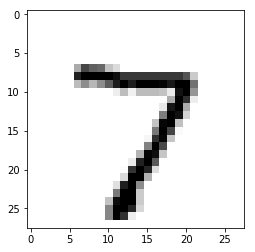

In [26]:
# 테스트셋의 첫 번째 이미지 출력
image = test_data[0]

plt.imshow(image, cmap=plt.cm.binary)
plt.show()


테스트셋의 첫 번째 이미지를 보니 예측값인 7과 일치합니다.